In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import re
import networkx as nx
from stats import *
from data import *
import time
import os

%matplotlib inline

In [78]:
# p-values
# для эллиптических распределений
# для больших n ???

# k = kurtosis([daily_A, daily_AA, daily_AAME, daily_AAL, daily_AAMC], 250, 5)
# p_values_pearson = []
# p_values_sign = []

# for i in range(N):
#     ps_pearson = []
#     ps_sign = []
    
#     for j in range(N):
#         if i == j:
#             ps_pearson.append(0)
#             ps_sign.append(0)
#         else:
#             ps_pearson.append(1 - sps.norm.cdf(np.sqrt(n/(k + 1)) * t_stats[i][j]))
#             ps_sign.append(1 - sps.norm.cdf((t_sign_stats[i][j] - n * threshold)/(np.sqrt(n*threshold*(1-threshold)))))
#     p_values_pearson.append(ps_pearson)
#     p_values_sign.append(ps_sign)
                      
# print('p_values pearson', '\n', np.array(p_values_pearson), '\n', 'p_values sign', '\n', np.array(p_values_sign))

# Graphs


In [79]:

THRESHOLDS = [-0.2, -0.1, 0.005, 0.01, 0.1, 0.17, 0.2, 0.23, 0.25]
N_COMPANIES = 5
N_DAYS = 250
ALPHA = 0.05
FOLDER_PATH = '/home/danila/Downloads/archive/stock_market_data/nasdaq/csv'
INDEX = get_indexes()

dataframes = read_data(FOLDER_PATH)
daily_returns = daily(dataframes)
daily_returns_dataframes = daily_returns_dataframe(daily_returns, dataframes)

edges_pearson_list = {}
edges_sign_list = {}
edges_kendall_list = {}

NameError: name 'get_indexes' is not defined

In [80]:
os.

NameError: name 'data' is not defined

In [4]:
start = time.time()
for threshold in THRESHOLDS:
    p_values_pearson, p_values_sign, p_values_kendall = p_values(threshold, N_DAYS, N_COMPANIES,
                                           daily_returns, daily_returns_dataframes)
    edges_pearson, edges_sign, edges_kendall = edges(p_values_pearson, p_values_sign, p_values_kendall,
                                                     N_COMPANIES, ALPHA)
    edges_pearson_list[threshold] = edges_pearson
    edges_sign_list[threshold] = edges_sign
    edges_kendall_list[threshold] = edges_kendall



# print("edges_pearson", '\n', edges_pearson, '\n', 'edges_sign', '\n', edges_sign)

nodes = ['A', 'AA', 'AAME', 'AAL', 'AAMC']

end = time.time()
print(end - start)

266.14341044425964


In [6]:
G_pearson.__dict__


{'graph': {},
 '_node': {'A': {}, 'AA': {}, 'AAME': {}, 'AAL': {}, 'AAMC': {}},
 '_adj': {'A': {}, 'AA': {}, 'AAME': {}, 'AAL': {}, 'AAMC': {}},
 'edges': EdgeView([]),
 'nodes': NodeView(('A', 'AA', 'AAME', 'AAL', 'AAMC'))}

In [7]:
G_pearson.edges

EdgeView([])

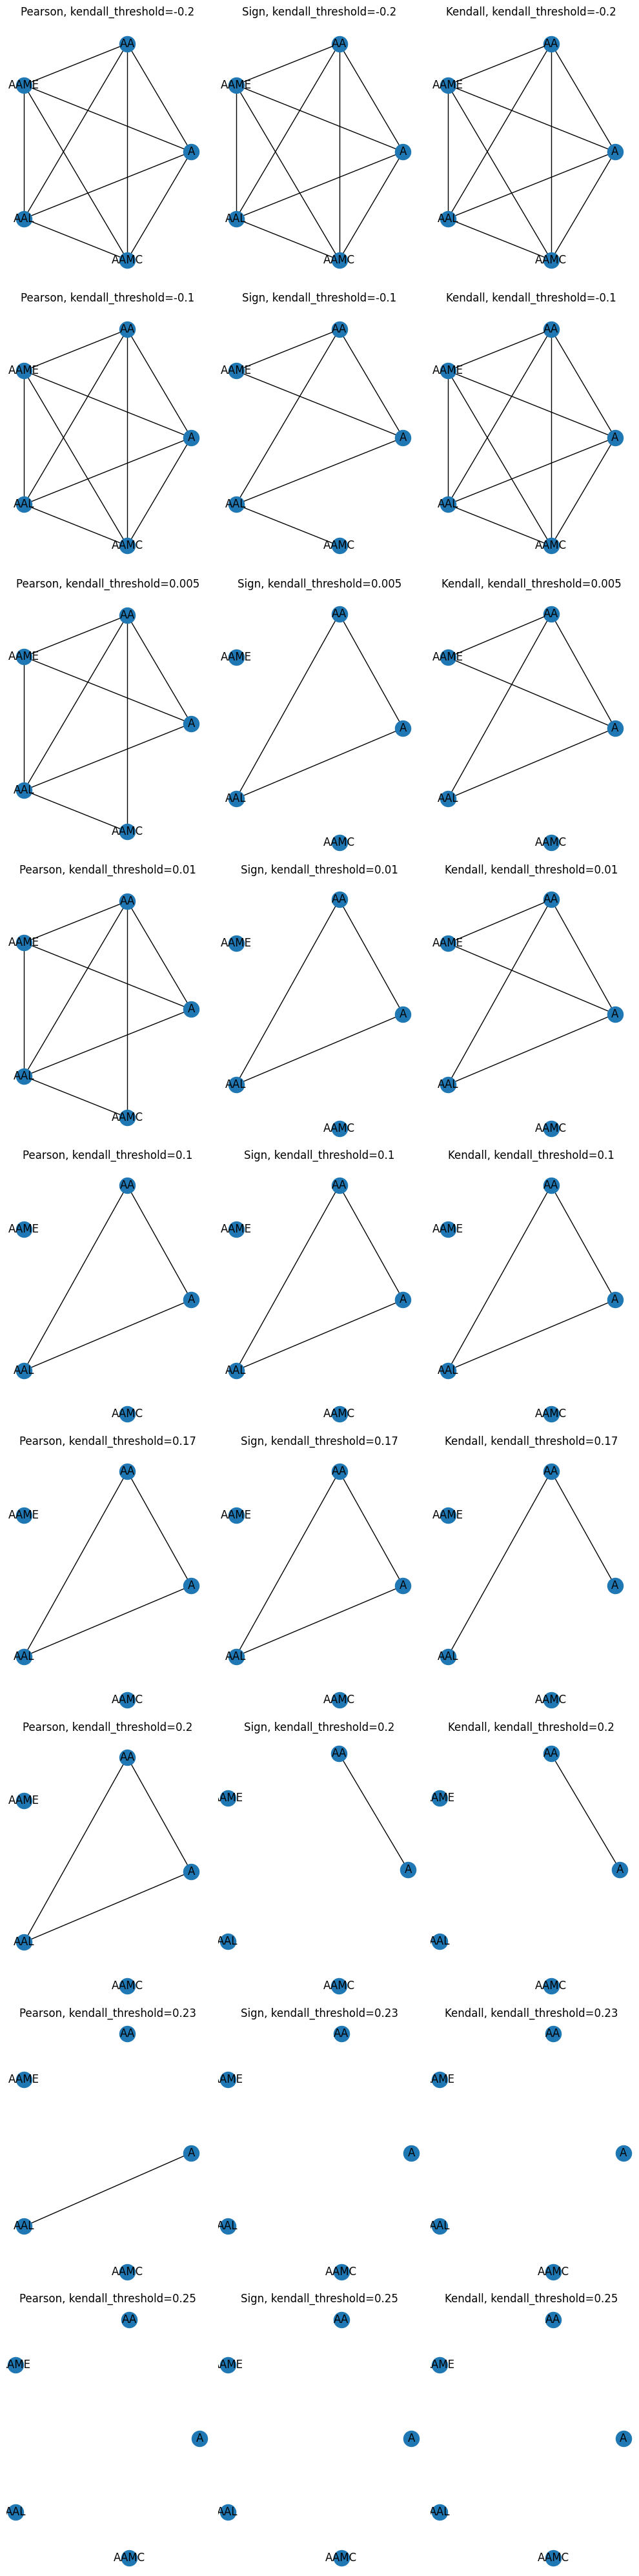

In [5]:
fig, ax = plt.subplots(9, 3, figsize=(10, 40), layout='tight')
for i, threshold in enumerate(THRESHOLDS):
    G_pearson = nx.Graph()
    G_sign = nx.Graph()
    G_kendall = nx.Graph()
    
    G_pearson.add_nodes_from(nodes)
    G_sign.add_nodes_from(nodes)
    G_kendall.add_nodes_from(nodes)
    
    G_pearson.add_edges_from(edges_pearson_list[threshold])
    G_sign.add_edges_from(edges_sign_list[threshold])
    G_kendall.add_edges_from(edges_kendall_list[threshold])
    
    nx.draw(G_pearson, pos=nx.circular_layout(G_pearson), ax=ax[i, 0], with_labels=True)
    ax[i, 0].set_title(f'Pearson, kendall_threshold={threshold}')

    
    nx.draw(G_sign, pos=nx.circular_layout(G_sign), ax=ax[i, 1], with_labels=True)
    ax[i, 1].set_title(f'Sign, kendall_threshold={threshold}')
    
    nx.draw(G_kendall, pos=nx.circular_layout(G_sign), ax=ax[i, 2], with_labels=True)
    ax[i, 2].set_title(f'Kendall, kendall_threshold={threshold}')
    

plt.savefig("graphs.png")

In [9]:
########################################################################################################

In [6]:
for threshold in THRESHOLDS:
    p_values_pearson, p_values_sign, p_values_kendall = p_values(threshold, N_DAYS, N_COMPANIES,
                                           daily_returns, daily_returns_dataframes, elliptical=False)
    edges_pearson, edges_sign = edges(p_values_pearson, p_values_sign, p_values_kendall,
                                                     N_COMPANIES, ALPHA, elliptical=False)
    edges_pearson_list[threshold] = edges_pearson
    edges_sign_list[threshold] = edges_sign



# print("edges_pearson", '\n', edges_pearson, '\n', 'edges_sign', '\n', edges_sign)

nodes = ['A', 'AA', 'AAME', 'AAL', 'AAMC']


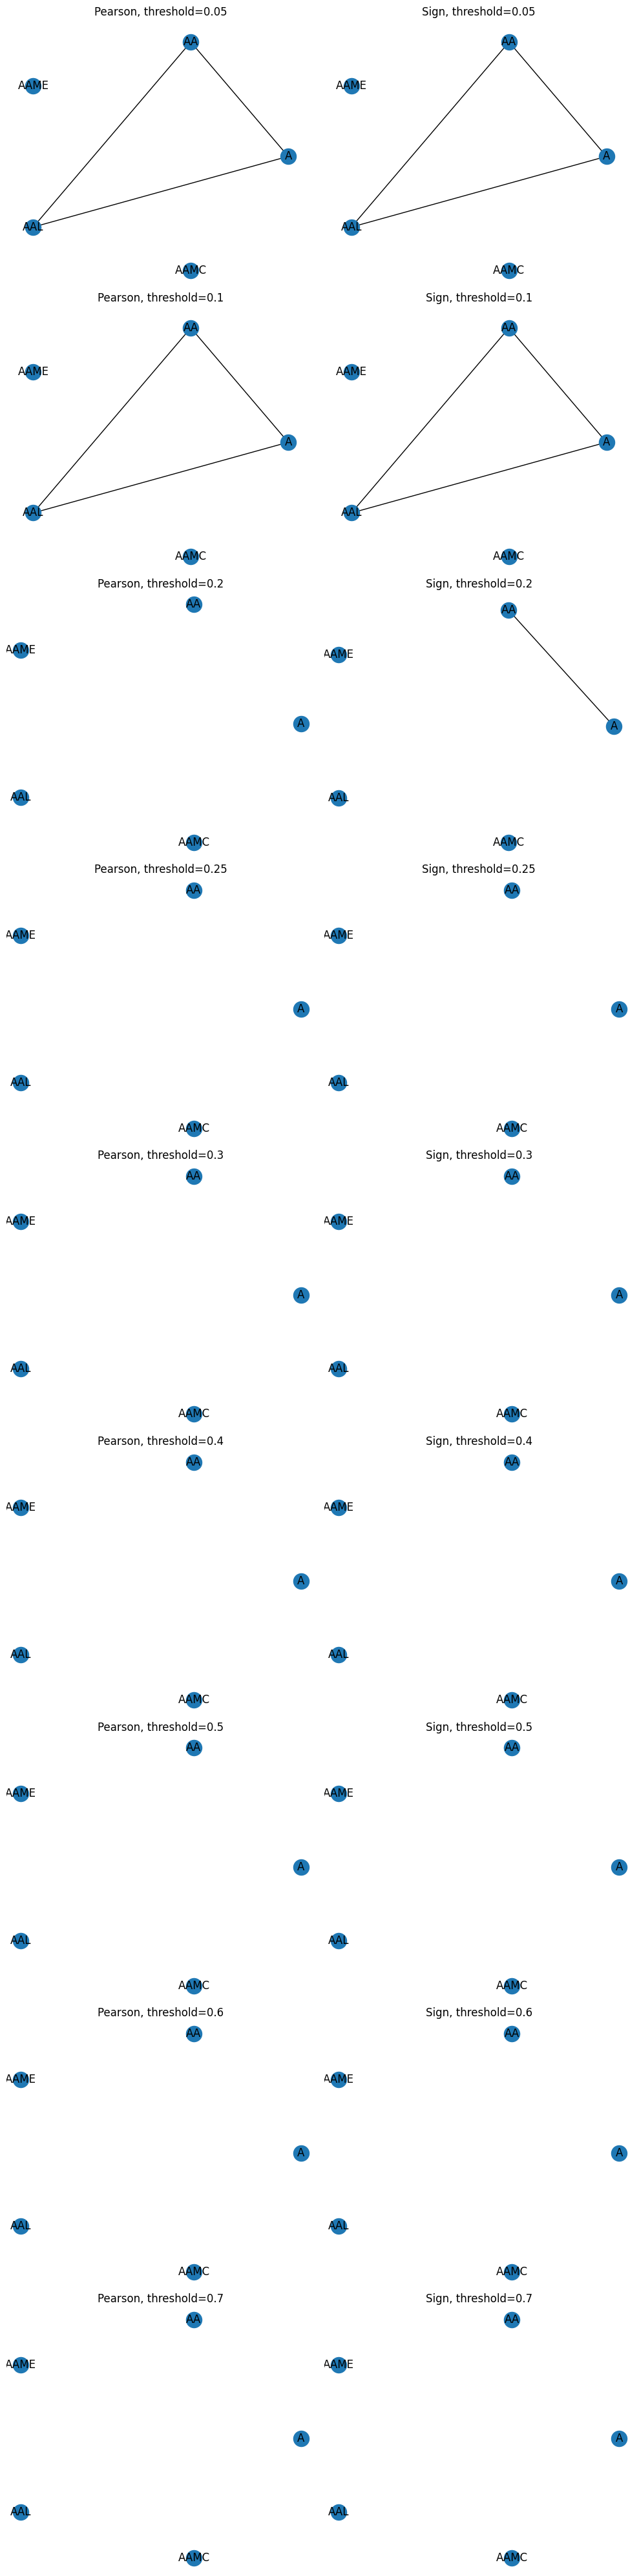

In [7]:
fig, ax = plt.subplots(9, 2, figsize=(10, 40), layout='tight')
for i, threshold in enumerate(THRESHOLDS):
    G_pearson = nx.Graph()
    G_sign = nx.Graph()
    #G_kendall = nx.Graph()
    
    G_pearson.add_nodes_from(nodes)
    G_sign.add_nodes_from(nodes)
    #G_kendall.add_nodes_from(nodes)
    
    G_pearson.add_edges_from(edges_pearson_list[threshold])
    G_sign.add_edges_from(edges_sign_list[threshold])
    #G_kendall.add_edges_from(edges_kendall_list[threshold])
    
    nx.draw(G_pearson, pos=nx.circular_layout(G_pearson), ax=ax[i, 0], with_labels=True)
    ax[i, 0].set_title(f'Pearson, threshold={threshold}')

    
    nx.draw(G_sign, pos=nx.circular_layout(G_sign), ax=ax[i, 1], with_labels=True)
    ax[i, 1].set_title(f'Sign, threshold={threshold}')
    
    #nx.draw(G_kendall, pos=nx.circular_layout(G_sign), ax=ax[i, 2], with_labels=True)
    #ax[i, 2].set_title(f'Kendall, threshold={threshold}')
    

plt.show()

In [2]:
!pwd

/home/danila/PycharmProjects/pythonProject1


In [1]:
import os

In [47]:
file_names_list: list[str] = os.listdir('/home/danila/Downloads/archive/stock_market_data/nasdaq/csv')

In [48]:
file_names_str = ' '.join(file_names_list)
print(file_names_str)

WABC.csv INFN.csv GMAN.csv MAT.csv EXPE.csv COCO.csv PCTY.csv SPWH.csv KELYA.csv EBTC.csv GTLS.csv CECO.csv RBCAA.csv REFR.csv SFM.csv IDCC.csv SWKS.csv BMRN.csv BIOS.csv FREE.csv BLKB.csv WAYN.csv SNCR.csv BLMN.csv CYCC.csv EGHT.csv BSPM.csv VALU.csv CAAS.csv MMLP.csv GSBC.csv YNDX.csv SBNY.csv AELTF.csv PCRX.csv BLDP.csv BRFH.csv PETS.csv CBAY.csv LECO.csv SLP.csv ANGI.csv FRSH.csv RWLK.csv COBZ.csv AIMC.csv QRHC.csv CVGW.csv ESRX.csv UMPQ.csv VLY.csv SBGI.csv GASS.csv GNBC.csv RNWK.csv MARPS.csv UCBI.csv MRVL.csv PCYO.csv OTEX.csv CPRX.csv ACIW.csv PME.csv SFST.csv AIRT.csv GRSFF.csv HOLX.csv MSCC.csv VOXX.csv RXDX.csv EHTH.csv CAKE.csv Z.csv ANGO.csv AUBN.csv SLM.csv ATSG.csv SKYW.csv SCHN.csv PINC.csv MRNS.csv ATRA.csv CSIQ.csv PAYX.csv ANAC.csv ISBC.csv GLDD.csv ARCB.csv RADA.csv RITT.csv LWAY.csv XNCR.csv VNOM.csv FTNT.csv SNMX.csv BPOP.csv MYRG.csv ILMN.csv RGLD.csv STRA.csv DFEL.csv NEOG.csv MRCY.csv CNTY.csv MEIP.csv FTEK.csv CSPI.csv FNLC.csv HAYN.csv CFNB.csv UFPT.csv ON.cs

In [49]:
index = re.findall('[A-Z]+', file_names_str)
index

['WABC',
 'INFN',
 'GMAN',
 'MAT',
 'EXPE',
 'COCO',
 'PCTY',
 'SPWH',
 'KELYA',
 'EBTC',
 'GTLS',
 'CECO',
 'RBCAA',
 'REFR',
 'SFM',
 'IDCC',
 'SWKS',
 'BMRN',
 'BIOS',
 'FREE',
 'BLKB',
 'WAYN',
 'SNCR',
 'BLMN',
 'CYCC',
 'EGHT',
 'BSPM',
 'VALU',
 'CAAS',
 'MMLP',
 'GSBC',
 'YNDX',
 'SBNY',
 'AELTF',
 'PCRX',
 'BLDP',
 'BRFH',
 'PETS',
 'CBAY',
 'LECO',
 'SLP',
 'ANGI',
 'FRSH',
 'RWLK',
 'COBZ',
 'AIMC',
 'QRHC',
 'CVGW',
 'ESRX',
 'UMPQ',
 'VLY',
 'SBGI',
 'GASS',
 'GNBC',
 'RNWK',
 'MARPS',
 'UCBI',
 'MRVL',
 'PCYO',
 'OTEX',
 'CPRX',
 'ACIW',
 'PME',
 'SFST',
 'AIRT',
 'GRSFF',
 'HOLX',
 'MSCC',
 'VOXX',
 'RXDX',
 'EHTH',
 'CAKE',
 'Z',
 'ANGO',
 'AUBN',
 'SLM',
 'ATSG',
 'SKYW',
 'SCHN',
 'PINC',
 'MRNS',
 'ATRA',
 'CSIQ',
 'PAYX',
 'ANAC',
 'ISBC',
 'GLDD',
 'ARCB',
 'RADA',
 'RITT',
 'LWAY',
 'XNCR',
 'VNOM',
 'FTNT',
 'SNMX',
 'BPOP',
 'MYRG',
 'ILMN',
 'RGLD',
 'STRA',
 'DFEL',
 'NEOG',
 'MRCY',
 'CNTY',
 'MEIP',
 'FTEK',
 'CSPI',
 'FNLC',
 'HAYN',
 'CFNB',
 'UFPT',
 'ON'